In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./heart.csv")


In [4]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# EDA

In [5]:
# check all columns
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [6]:
# now check the shape of the data set
print(df.shape)

(918, 12)


In [7]:
# info of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [8]:
# describe the data
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [9]:
# check all duplicates
total_duplicates = df.duplicated().sum()
print(total_duplicates)

0


In [10]:
# now check the null values
total_null = df.isnull().sum()
print(total_null)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


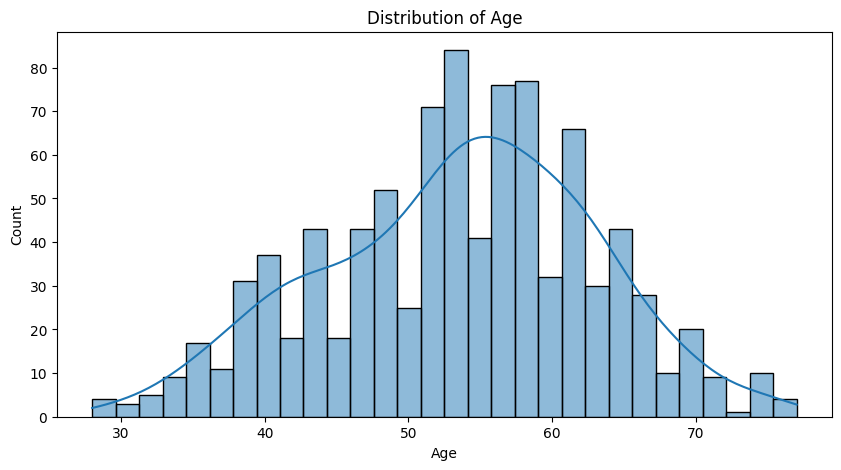

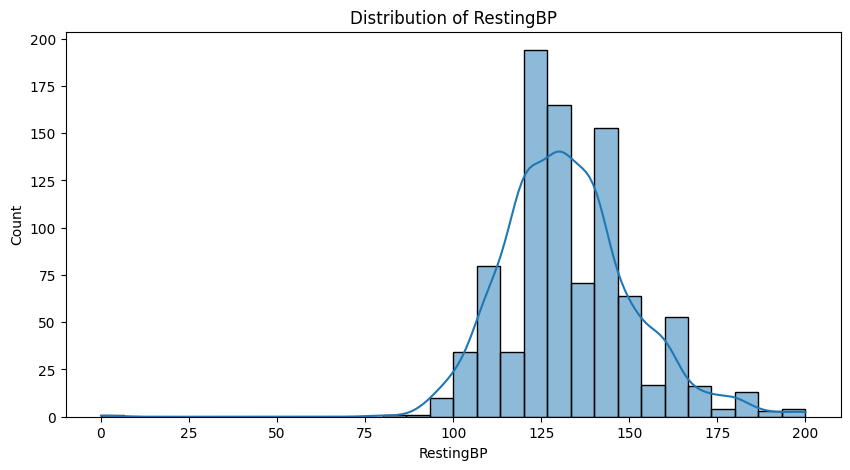

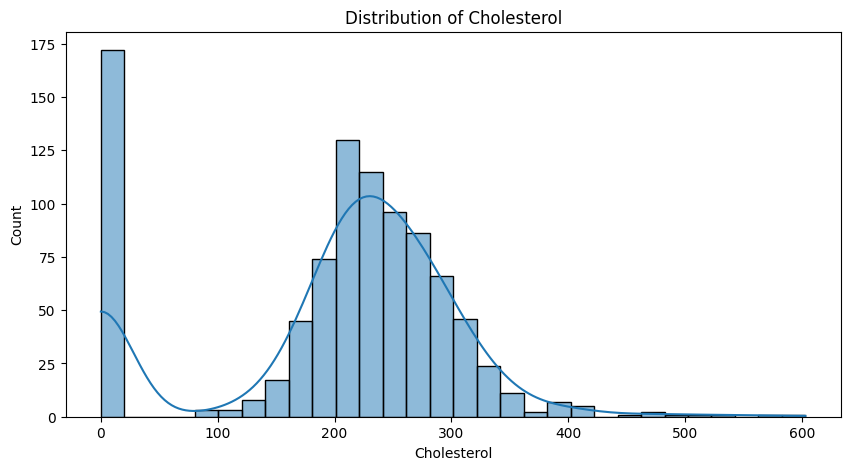

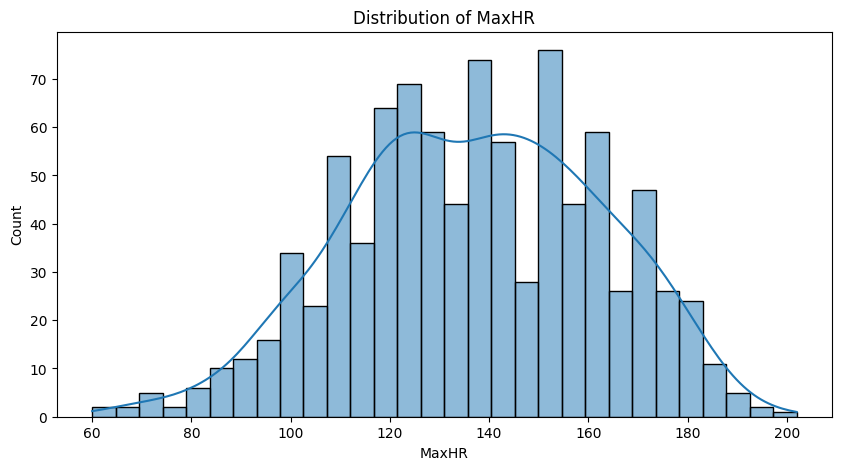

In [11]:
# now check the data distribution
numeric_columns = ["Age", "RestingBP", "Cholesterol","MaxHR"]
for col in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

In [12]:
# now replace all 0 cholesterol with the mean value
mean_cholesterol = df.loc[df['Cholesterol'] != 0 , 'Cholesterol'].mean()
df["Cholesterol"] = df["Cholesterol"].replace(0, mean_cholesterol)
df["Cholesterol"]= df["Cholesterol"].round(2)
print(df["Cholesterol"].value_counts())

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64


In [13]:
# now same for RestingBP
mean_restingbp = df.loc[df["RestingBP"] != 0, "RestingBP"].mean()
df["RestingBP"] = df["RestingBP"].replace(0,mean_restingbp)
df["RestingBP"] = df["RestingBP"].round(2)
print(df["RestingBP"].value_counts())

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64


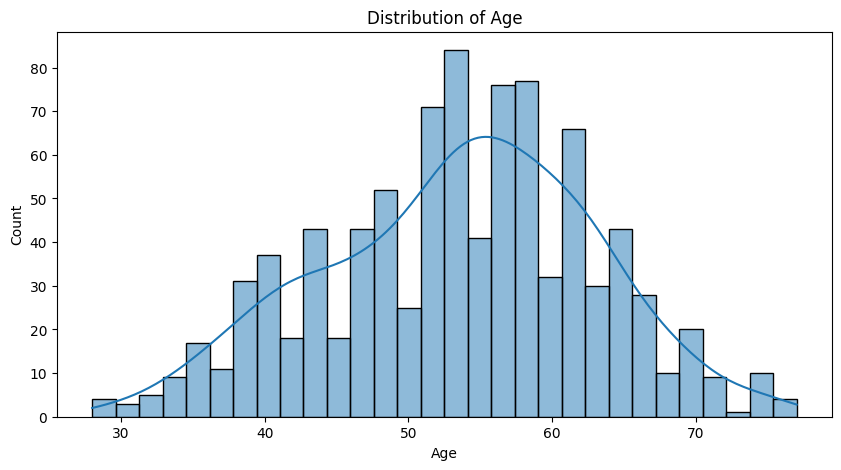

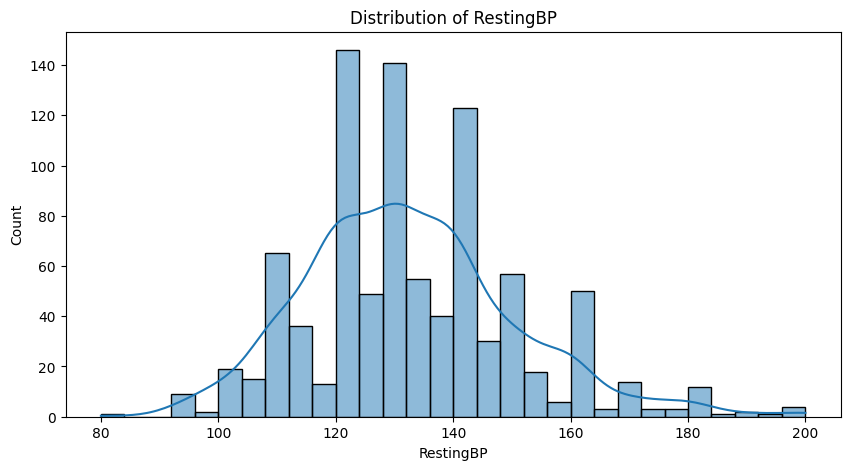

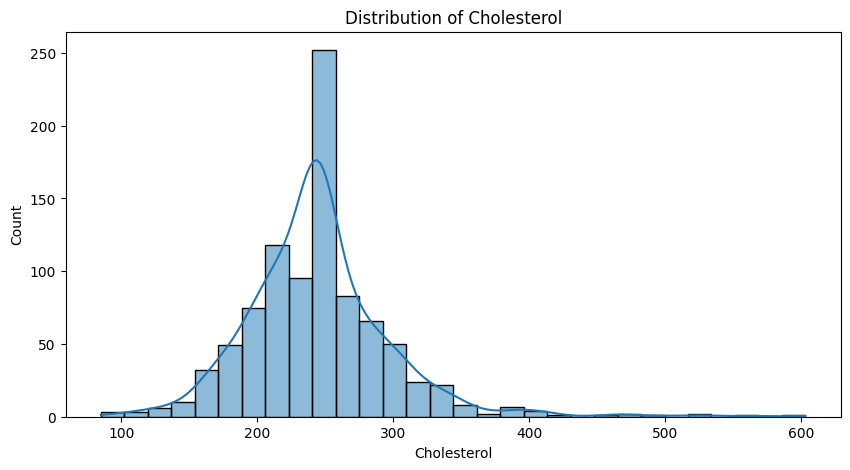

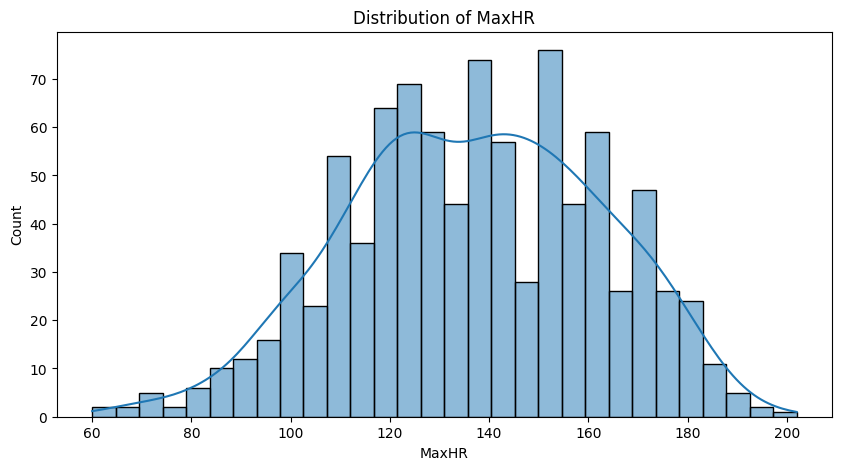

In [14]:
# now check the data distribution
numeric_columns = ["Age", "RestingBP", "Cholesterol","MaxHR"]
for col in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

In [15]:
# now fetch all categorical columns
categorical_columns = [col for col in df.columns 
                       if df[col].dtype == "object" or df[col].dtype == "category"
                          or df[col].dtype == "bool" or set(df[col].unique()) <= {0,1}
                       ]
print(categorical_columns)


['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


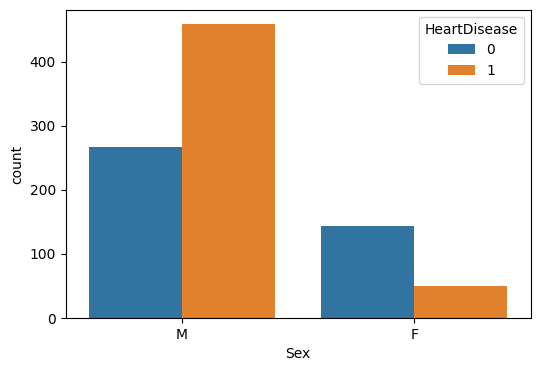

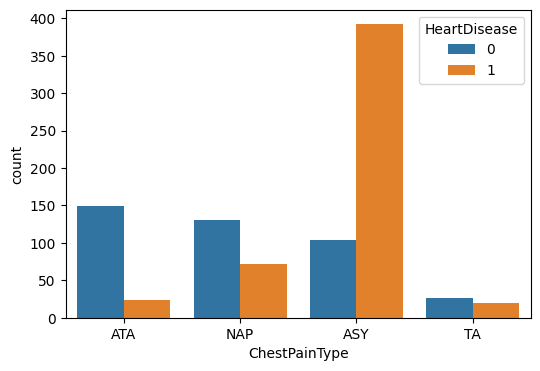

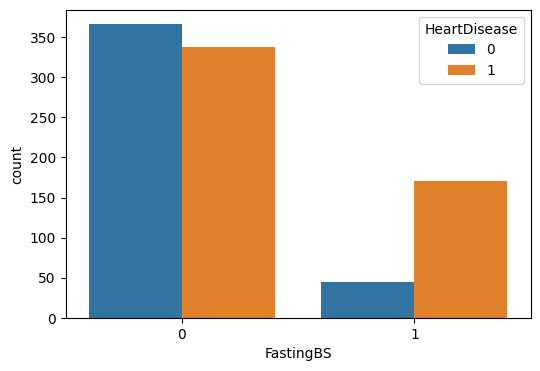

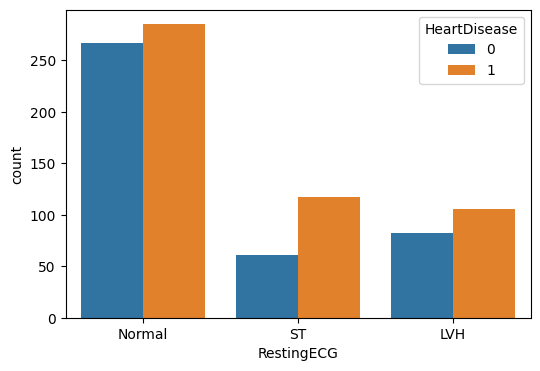

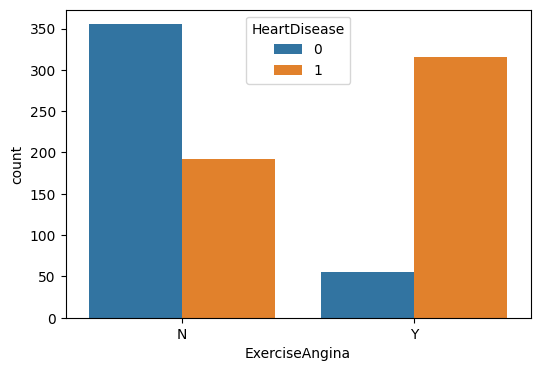

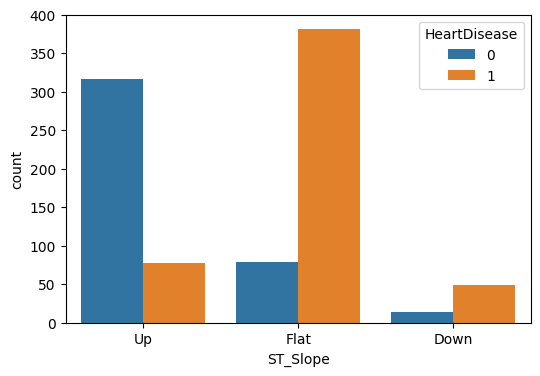

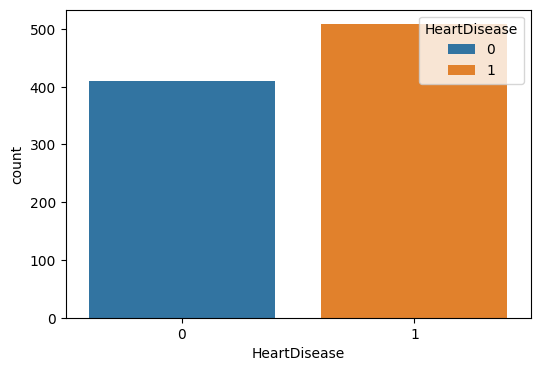

In [16]:
# now create the count plot for all categorical columns because we have to fetch is heart disease is expect on any data
for col in categorical_columns:
    plt.figure(figsize=(6, 4)) 
    sns.countplot(x=df[col], hue=df["HeartDisease"])

# Data processing and cleaning

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40      140.0        289.0          0    172      0.0             0   
1   49      160.0        180.0          0    156      1.0             1   
2   37      130.0        283.0          0     98      0.0             0   
3   48      138.0        214.0          0    108      1.5             1   
4   54      150.0        195.0          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

In [19]:
# now change the data type 
df_encoded = df_encoded.astype(int)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   RestingBP          918 non-null    int64
 2   Cholesterol        918 non-null    int64
 3   FastingBS          918 non-null    int64
 4   MaxHR              918 non-null    int64
 5   Oldpeak            918 non-null    int64
 6   HeartDisease       918 non-null    int64
 7   Sex_M              918 non-null    int64
 8   ChestPainType_ATA  918 non-null    int64
 9   ChestPainType_NAP  918 non-null    int64
 10  ChestPainType_TA   918 non-null    int64
 11  RestingECG_Normal  918 non-null    int64
 12  RestingECG_ST      918 non-null    int64
 13  ExerciseAngina_Y   918 non-null    int64
 14  ST_Slope_Flat      918 non-null    int64
 15  ST_Slope_Up        918 non-null    int64
dtypes: int64(16)
memory usage: 114.9 KB
None


In [21]:
from sklearn.preprocessing import  StandardScaler
numeric_columns = ["Age", "RestingBP","Cholesterol","MaxHR","Oldpeak"]
scaler = StandardScaler()
df_encoded[numeric_columns]= scaler.fit_transform(df_encoded[numeric_columns])
print(df_encoded.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.414885     0.834754          0  1.382928 -0.727592   
1 -0.478484   1.527224    -1.210675          0  0.754157  0.282891   
2 -1.751359  -0.141284     0.722161          0 -1.525138 -0.727592   
3 -0.584556   0.303651    -0.572651          0 -1.132156  0.282891   
4  0.051881   0.971054    -0.929194          0 -0.581981 -0.727592   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0      1                  1                  0   
1             1      0                  0                  1   
2             0      1                  1                  0   
3             1      0                  0                  0   
4             0      1                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0                 0                  1              0                 0   
1                 0                  1      